# IMPORT PACKAGES

In [1]:
import pandas as pd

In [2]:
from datetime import datetime

In [3]:
from datetime import timedelta

In [4]:
from datetime import date

In [5]:
import numpy as np

In [6]:
import seaborn as sns

In [7]:
import matplotlib.ticker as ticker

In [8]:
import matplotlib.pyplot as plt

In [9]:
import hashlib

In [10]:
import matplotlib.ticker as mtick

In [11]:
from sklearn.cluster import KMeans

## DATA ANONYMIZATION
*Activate fields if needed*

# UPLOAD ANONYMIZED DATA

In [ ]:
while True:
    try:
        data = str(input('paste date path: ')).replace('"','')
        if data.endswith('xlsx'):
            sales_info = pd.read_excel(data, engine='openpyxl')
            print('\nFile format is .xlsx\n', sales_info.columns)
            break
        elif data.endswith('xls'):
            sales_info = pd.read_excel(data, engine='xlrd')
            print('\nFile format is .xls\n', sales_info.columns)
            break
        else:
            print('\nFile format is invalid! \nPaste the file path as .xlsx or .xls! ')
            continue
    except FileNotFoundError:
        print('\nFileNotFoundError!\nCheck file name before extension .xxx!')

In [241]:
sales_info = sales_info[['Customer', 'Invoiced Sales Amount_year', 'Sales Order Lines Count_year',
                         'Invoiced Sales Amount_peak', 'Sales Order Lines Count_peak']]

In [242]:
sales_info.head()

,Customer,Invoiced Sales Amount_year,Sales Order Lines Count_year,Invoiced Sales Amount_peak,Sales Order Lines Count_peak
0,21484,8623.18,114,1137.47,13.0
1,21559,82484.76,265,26232.79,111.0
2,21900,2814.03,53,2179.31,39.0
3,22014,107310.79,716,27900.40,198.0
4,22337,3334.75,26,1993.65,14.0


## Data Exploration 

In [31]:
sales_info.isna().sum()

Customer                         0
Invoiced Sales Amount_year      59
Sales Order Lines Count_year     0
Invoiced Sales Amount_peak      96
Sales Order Lines Count_peak    81
dtype: int64

In [32]:
sales_info.describe() # contains negative values

,Invoiced Sales Amount_year,Sales Order Lines Count_year,Invoiced Sales Amount_peak,Sales Order Lines Count_peak
count,2587.000000,2646.000000,2550.000000,2565.000000
mean,10962.090997,63.922525,3589.024212,21.716569
std,31929.675313,154.834319,9657.724658,47.629948
min,-2128.370000,1.000000,-1684.870000,1.000000
25%,554.620000,5.000000,217.750000,2.000000
50%,2379.780000,18.000000,868.655000,7.000000
75%,9057.975000,60.000000,2808.802500,20.000000
max,823163.860000,2381.000000,221451.530000,688.000000


In [33]:
sales_info['Invoiced Sales Amount_year'] = sales_info['Invoiced Sales Amount_year'].replace(0, 0.01)

In [34]:
sales_info['Sales Order Lines Count_year'] = sales_info['Sales Order Lines Count_year'].replace(0, 0.01)

In [35]:
sales_info['Invoiced Sales Amount_peak'] = sales_info['Invoiced Sales Amount_peak'].replace(0, 0.01)

In [36]:
sales_info['Sales Order Lines Count_peak'] = sales_info['Sales Order Lines Count_peak'].replace(0, 0.01)

In [37]:
sales_info.describe() 

,Invoiced Sales Amount_year,Sales Order Lines Count_year,Invoiced Sales Amount_peak,Sales Order Lines Count_peak
count,2587.000000,2646.000000,2550.000000,2565.000000
mean,10962.091272,63.922525,3589.024596,21.716569
std,31929.675219,154.834319,9657.724515,47.629948
min,-2128.370000,1.000000,-1684.870000,1.000000
25%,554.620000,5.000000,217.750000,2.000000
50%,2379.780000,18.000000,868.655000,7.000000
75%,9057.975000,60.000000,2808.802500,20.000000
max,823163.860000,2381.000000,221451.530000,688.000000


<AxesSubplot:title={'center':'Relationship Plot Peak'}, xlabel='Sales Order Lines Count (Peak)', ylabel='Invoiced Sales Amount (Peak)'>

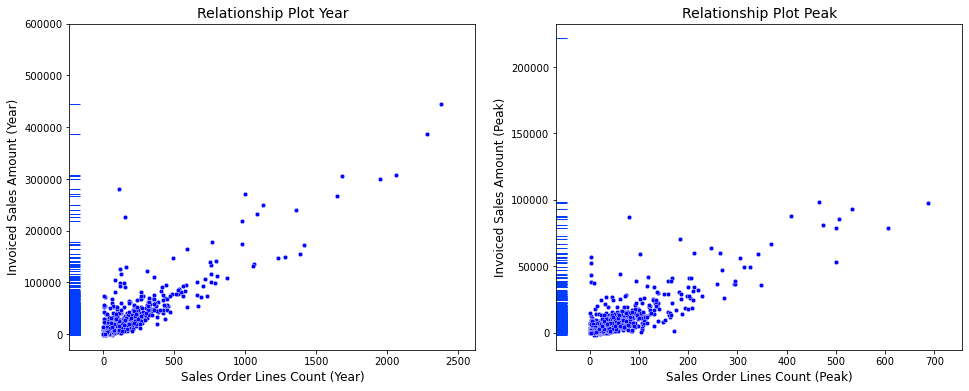

In [38]:
sns.set_palette('bright')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
plot1 = sns.scatterplot(data=sales_info, y='Invoiced Sales Amount_year', x='Sales Order Lines Count_year', s=20, color='blue', ax=ax1)
plot1.set(ylim=(-30000, 600000))

plot1.set_xlabel('Sales Order Lines Count (Year)', fontsize=12)
plot1.set_ylabel('Invoiced Sales Amount (Year)', fontsize=12)
plot1.set_title('Relationship Plot Year', fontsize=14)

sns.rugplot(data=sales_info, y='Invoiced Sales Amount_year', ax=ax1)


plot2 = sns.scatterplot(data=sales_info, y='Invoiced Sales Amount_peak', x='Sales Order Lines Count_peak', s=20, color='blue', ax=ax2)

plot2.set_xlabel('Sales Order Lines Count (Peak)', fontsize=12)
plot2.set_ylabel('Invoiced Sales Amount (Peak)', fontsize=12)
plot2.set_title('Relationship Plot Peak', fontsize=14)

sns.rugplot(data=sales_info, y='Invoiced Sales Amount_peak', ax=ax2)

Text(0.5, 0, 'Sales Order Lines Count_peak')

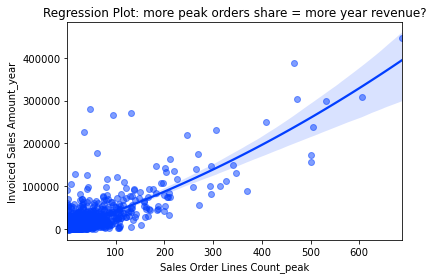

In [39]:
sns.set_palette('bright')
plot = sns.regplot(data=sales_info, y='Invoiced Sales Amount_year', x='Sales Order Lines Count_peak', scatter_kws={'alpha': 0.5}, order=2)
plot.set_title('Regression Plot: more peak orders share = more year revenue?')
plot.set_xlabel('Sales Order Lines Count_peak')

# MAKE DATA TIDY

In [40]:
sales_info.isna().sum()

Customer                         0
Invoiced Sales Amount_year      59
Sales Order Lines Count_year     0
Invoiced Sales Amount_peak      96
Sales Order Lines Count_peak    81
dtype: int64

In [41]:
# fill NA or 0 with a value close to 0 for later log transformation to avoid inf
sales_info = sales_info.fillna(0.01)

In [44]:
sales_info = sales_info[['Customer', 'Invoiced Sales Amount_year', 'Invoiced Sales Amount_peak', 'Sales Order Lines Count_year', 'Sales Order Lines Count_peak']]

In [45]:
sales_info['Invoiced Sales Amount_year'].min()

-2128.37

In [46]:
sales_info['Invoiced Sales Amount_peak'].min()

-1684.8700000000001

In [47]:
sales_info = sales_info.loc[sales_info['Invoiced Sales Amount_year']>0] # skip negative vaues

In [48]:
sales_info = sales_info.loc[sales_info['Invoiced Sales Amount_peak']>0] # skip negative values

In [49]:
sales_info.describe()

,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak
count,2.622000e+03,2.622000e+03,2622.000000,2622.000000
mean,1.080724e+04,3.492486e+03,64.302441,21.170778
std,3.174293e+04,9.541268e+03,155.478785,47.232553
min,2.842171e-14,2.131628e-14,1.000000,0.010000
25%,4.976625e+02,1.848050e+02,5.000000,2.000000
50%,2.283470e+03,8.010550e+02,18.000000,6.000000
75%,8.892427e+03,2.723533e+03,60.000000,19.000000
max,8.231639e+05,2.214515e+05,2381.000000,688.000000


In [50]:
sales_info = sales_info[sales_info['Invoiced Sales Amount_year'] < 800000]

In [51]:
sales_info.head()

,Customer,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak
0,021484,8623.18,1137.47,114.0,13.0
1,021559,82484.76,26232.79,265.0,111.0
2,021900,2814.03,2179.31,53.0,39.0
3,022014,107310.79,27900.40,716.0,198.0
4,022337,3334.75,1993.65,26.0,14.0


# Data pre-processing

In [52]:
sales_i = sales_info.copy()

In [53]:
sales_i['Invoiced Sales Amount_year'] = round(pd.to_numeric(sales_i['Invoiced Sales Amount_year']),2)

In [54]:
sales_i['Sales Order Lines Count_year'] = round(pd.to_numeric(sales_i['Sales Order Lines Count_year']),2)

In [55]:
sales_i['Invoiced Sales Amount_peak'] = round(pd.to_numeric(sales_i['Invoiced Sales Amount_peak']),2)

In [56]:
sales_i['Sales Order Lines Count_peak'] = round(pd.to_numeric(sales_i['Sales Order Lines Count_peak']),2)

In [57]:
sales_i['peak_order_%'] = (sales_i['Sales Order Lines Count_peak'] / sales_i['Sales Order Lines Count_year']).round(2) * 100

In [58]:
sales_i['peak_revenue_%'] = (sales_i['Invoiced Sales Amount_peak'] / sales_i['Invoiced Sales Amount_year']).round(2) * 100

In [59]:
sales_i.describe()

,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%
count,2621.000000,2621.000000,2621.000000,2621.000000,2621.00000,2618.000000
mean,10497.295589,3409.327161,64.322396,21.178852,53.34834,55.618411
std,27495.872746,8539.994981,155.505095,47.239756,35.62901,36.899277
min,0.000000,0.000000,1.000000,0.010000,0.00000,0.000000
25%,497.640000,184.780000,5.000000,2.000000,22.00000,22.000000
50%,2280.570000,800.390000,18.000000,6.000000,45.00000,50.000000
75%,8888.010000,2722.220000,60.000000,19.000000,100.00000,100.000000
max,445248.180000,98122.470000,2381.000000,688.000000,100.00000,140.000000


(0.0, 100.0)

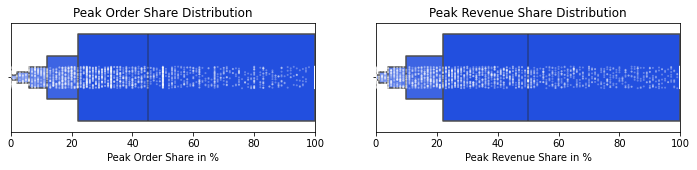

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,2))
sns.boxenplot(data=sales_i, x='peak_order_%', ax=ax1)
sns.stripplot(data=sales_i, x='peak_order_%', ax=ax1, color='white', alpha=0.3, size=2)
ax1.set_title('Peak Order Share Distribution')
ax1.set_xlabel('Peak Order Share in %')

sns.boxenplot(data=sales_i, x='peak_revenue_%', ax=ax2)
sns.stripplot(data=sales_i, x='peak_revenue_%', ax=ax2, color='white', alpha=0.3, size=2)
ax2.set_title('Peak Revenue Share Distribution')
ax2.set_xlabel('Peak Revenue Share in %')

ax1.set_xlim(0, 100)
ax2.set_xlim(0, 100)


In [63]:
sales_i.min()

Customer                        021484
Invoiced Sales Amount_year         0.0
Invoiced Sales Amount_peak         0.0
Sales Order Lines Count_year       1.0
Sales Order Lines Count_peak      0.01
peak_order_%                       0.0
peak_revenue_%                     0.0
dtype: object

# K-MEANS 

In [64]:
sales_i.describe()

,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%
count,2621.000000,2621.000000,2621.000000,2621.000000,2621.00000,2618.000000
mean,10497.295589,3409.327161,64.322396,21.178852,53.34834,55.618411
std,27495.872746,8539.994981,155.505095,47.239756,35.62901,36.899277
min,0.000000,0.000000,1.000000,0.010000,0.00000,0.000000
25%,497.640000,184.780000,5.000000,2.000000,22.00000,22.000000
50%,2280.570000,800.390000,18.000000,6.000000,45.00000,50.000000
75%,8888.010000,2722.220000,60.000000,19.000000,100.00000,100.000000
max,445248.180000,98122.470000,2381.000000,688.000000,100.00000,140.000000


In [67]:
sales_i.isna().sum()

Customer                        0
Invoiced Sales Amount_year      0
Invoiced Sales Amount_peak      0
Sales Order Lines Count_year    0
Sales Order Lines Count_peak    0
peak_order_%                    0
peak_revenue_%                  0
dtype: int64

In [66]:
sales_i['peak_revenue_%'] = sales_i['peak_revenue_%'].fillna(0)

In [68]:
sales_i.head()

,Customer,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%
0,021484,8623.18,1137.47,114.0,13.0,11.0,13.0
1,021559,82484.76,26232.79,265.0,111.0,42.0,32.0
2,021900,2814.03,2179.31,53.0,39.0,74.0,77.0
3,022014,107310.79,27900.40,716.0,198.0,28.0,26.0
4,022337,3334.75,1993.65,26.0,14.0,54.0,60.0


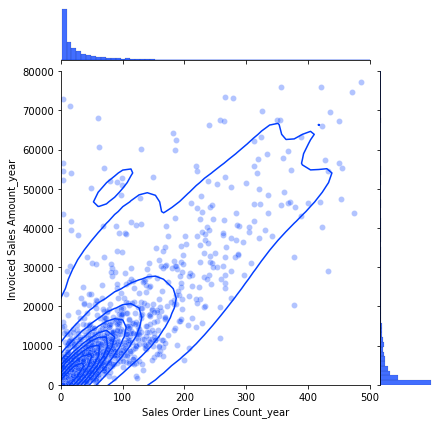

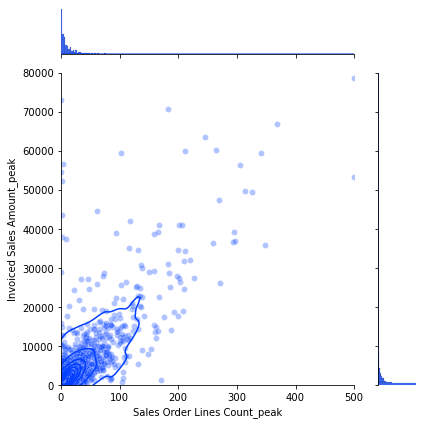

In [69]:
g1 = sns.JointGrid(data=sales_i, y='Invoiced Sales Amount_year', x='Sales Order Lines Count_year')
g1.plot(sns.scatterplot, sns.histplot)
g1.plot_joint(sns.kdeplot)
g1.plot_marginals(sns.kdeplot)
g1.ax_joint.collections[0].set_alpha(0.3)
g1.ax_joint.set_xlim(0, 500)
g1.ax_joint.set_ylim(0, 80000)

g2 = sns.JointGrid(data=sales_i, y='Invoiced Sales Amount_peak', x='Sales Order Lines Count_peak')
g2.plot(sns.scatterplot, sns.histplot)
g2.plot_joint(sns.kdeplot)
g2.plot_marginals(sns.kdeplot)
g2.ax_joint.collections[0].set_alpha(0.3)
g2.ax_joint.set_xlim(0, 500)
g2.ax_joint.set_ylim(0, 80000)

plt.tight_layout()
plt.show()

In [70]:
sales_i.columns

Index(['Customer', 'Invoiced Sales Amount_year', 'Invoiced Sales Amount_peak',
       'Sales Order Lines Count_year', 'Sales Order Lines Count_peak',
       'peak_order_%', 'peak_revenue_%'],
      dtype='object')

In [71]:
sales_i.head()

,Customer,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%
0,021484,8623.18,1137.47,114.0,13.0,11.0,13.0
1,021559,82484.76,26232.79,265.0,111.0,42.0,32.0
2,021900,2814.03,2179.31,53.0,39.0,74.0,77.0
3,022014,107310.79,27900.40,716.0,198.0,28.0,26.0
4,022337,3334.75,1993.65,26.0,14.0,54.0,60.0


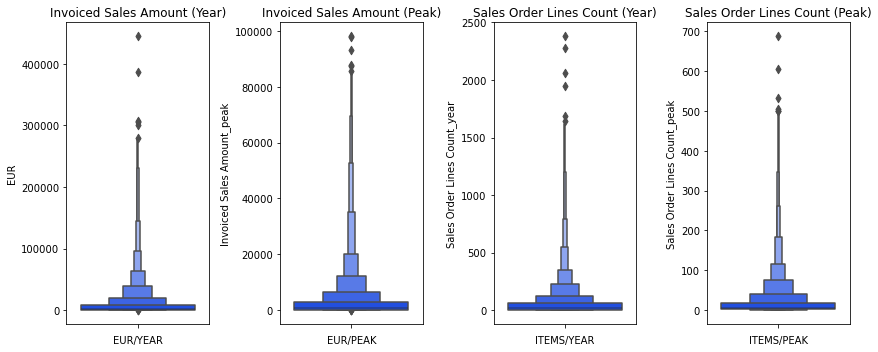

In [72]:
sns.set_palette('bright')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 5))

sns.boxenplot(data=sales_i, y='Invoiced Sales Amount_year', ax=ax1)
ax1.set_title('Invoiced Sales Amount (Year)')
ax1.set_xlabel('EUR/YEAR')
ax1.set_ylabel('EUR')

sns.boxenplot(data=sales_i, y='Invoiced Sales Amount_peak', ax=ax2)
ax2.set_title('Invoiced Sales Amount (Peak)')
ax2.set_xlabel('EUR/PEAK')

sns.boxenplot(data=sales_i, y='Sales Order Lines Count_year', ax=ax3)
ax3.set_title('Sales Order Lines Count (Year)')
ax3.set_xlabel('ITEMS/YEAR')

sns.boxenplot(data=sales_i, y='Sales Order Lines Count_peak', ax=ax4)
ax4.set_title('Sales Order Lines Count (Peak)')
ax4.set_xlabel('ITEMS/PEAK')

plt.tight_layout()

plt.show()

In [73]:
# create a copy for Revenue Frequency Monetary weight
rfm = sales_i.copy() 

In [74]:
rfm.head()

,Customer,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%
0,021484,8623.18,1137.47,114.0,13.0,11.0,13.0
1,021559,82484.76,26232.79,265.0,111.0,42.0,32.0
2,021900,2814.03,2179.31,53.0,39.0,74.0,77.0
3,022014,107310.79,27900.40,716.0,198.0,28.0,26.0
4,022337,3334.75,1993.65,26.0,14.0,54.0,60.0


In [75]:
rfm.describe()

,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%
count,2621.000000,2621.000000,2621.000000,2621.000000,2621.00000,2621.000000
mean,10497.295589,3409.327161,64.322396,21.178852,53.34834,55.554750
std,27495.872746,8539.994981,155.505095,47.239756,35.62901,36.926084
min,0.000000,0.000000,1.000000,0.010000,0.00000,0.000000
25%,497.640000,184.780000,5.000000,2.000000,22.00000,22.000000
50%,2280.570000,800.390000,18.000000,6.000000,45.00000,50.000000
75%,8888.010000,2722.220000,60.000000,19.000000,100.00000,100.000000
max,445248.180000,98122.470000,2381.000000,688.000000,100.00000,140.000000


C:\Users\hahafonova\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hahafonova\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hahafonova\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

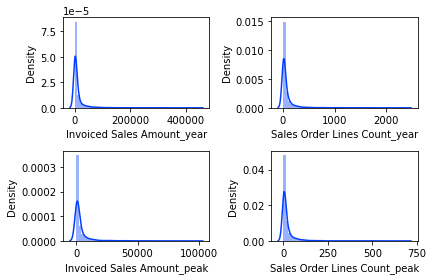

In [76]:
# see the data shape an distribution 

plt.subplot(2, 2, 1); sns.distplot(rfm['Invoiced Sales Amount_year'])
plt.tick_params(axis='x', labelsize=10)
plt.subplot(2, 2, 2); sns.distplot(rfm['Sales Order Lines Count_year'])
plt.tick_params(axis='x', labelsize=10)

plt.subplot(2, 2, 3); sns.distplot(rfm['Invoiced Sales Amount_peak'])
plt.tick_params(axis='x', labelsize=10)
plt.subplot(2, 2, 4); sns.distplot(rfm['Sales Order Lines Count_peak'])
plt.tick_params(axis='x', labelsize=10)
plt.tight_layout()
plt.show()

# LOG TRANSFRMATION
* check NAN
* check -inf

In [77]:
rfm.describe()

,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%
count,2621.000000,2621.000000,2621.000000,2621.000000,2621.00000,2621.000000
mean,10497.295589,3409.327161,64.322396,21.178852,53.34834,55.554750
std,27495.872746,8539.994981,155.505095,47.239756,35.62901,36.926084
min,0.000000,0.000000,1.000000,0.010000,0.00000,0.000000
25%,497.640000,184.780000,5.000000,2.000000,22.00000,22.000000
50%,2280.570000,800.390000,18.000000,6.000000,45.00000,50.000000
75%,8888.010000,2722.220000,60.000000,19.000000,100.00000,100.000000
max,445248.180000,98122.470000,2381.000000,688.000000,100.00000,140.000000


In [78]:
# round the figures to .2 and replace 0 by 0.01 to avoid inf after log transformation

In [81]:
rfm.set_index('Customer', inplace=True)

In [82]:
rfm['Invoiced Sales Amount_year'] = rfm['Invoiced Sales Amount_year'].round(0)

In [83]:
rfm['Invoiced Sales Amount_peak'] = rfm['Invoiced Sales Amount_peak'].round(0)

In [84]:
rfm['Invoiced Sales Amount_year'] = rfm['Invoiced Sales Amount_year'].replace(0, 0.01)

In [85]:
rfm['Invoiced Sales Amount_peak'] = rfm['Invoiced Sales Amount_peak'].replace(0, 0.01)

In [86]:
rfm['peak_order_%'] = rfm['peak_order_%'].round(0)

In [87]:
rfm['peak_revenue_%'] = rfm['peak_revenue_%'].round(0)

In [88]:
rfm['peak_order_%'] = rfm['peak_order_%'].replace(0, 0.01)

In [89]:
rfm['peak_revenue_%'] = rfm['peak_revenue_%'].replace(0, 0.01)

In [90]:
# as data is strongly skewed apply log tranformation
rfm_l = np.log(rfm)

In [91]:
rfm_l.head()

,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%
Customer,,,,,,
021484,9.062188,7.036148,4.736198,2.564949,2.397895,2.564949
021559,11.320372,10.174773,5.579730,4.709530,3.737670,3.465736
021900,7.942362,7.686621,3.970292,3.663562,4.304065,4.343805
022014,11.583486,10.236382,6.573680,5.288267,3.332205,3.258097
022337,8.112228,7.597898,3.258097,2.639057,3.988984,4.094345


In [92]:
rfm_l.describe()

,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%
count,2621.000000,2621.000000,2621.000000,2621.000000,2621.000000,2621.000000
mean,7.163262,5.970905,2.852154,1.792581,3.485781,3.462167
std,3.276810,3.455097,1.683897,1.809337,1.572782,1.711010
min,-4.605170,-4.605170,0.000000,-4.605170,-4.605170,-4.605170
25%,6.210600,5.220356,1.609438,0.693147,3.091042,3.091042
50%,7.732369,6.684612,2.890372,1.791759,3.806662,3.912023
75%,9.092457,7.909122,4.094345,2.944439,4.605170,4.605170
max,13.006387,11.493967,7.775276,6.533789,4.605170,4.941642


In [93]:
np.isfinite(rfm_l).sum()

Invoiced Sales Amount_year      2621
Invoiced Sales Amount_peak      2621
Sales Order Lines Count_year    2621
Sales Order Lines Count_peak    2621
peak_order_%                    2621
peak_revenue_%                  2621
dtype: int64

In [94]:
# normalize data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_l)
rfm_normalized = scaler.transform(rfm_l)


In [95]:
# apply index and columns from initial tidy data
rfm_normalized = pd.DataFrame(data=rfm_normalized, index=rfm_l.index, columns=rfm.columns)

In [96]:
rfm_normalized.isna().sum()

Invoiced Sales Amount_year      0
Invoiced Sales Amount_peak      0
Sales Order Lines Count_year    0
Sales Order Lines Count_peak    0
peak_order_%                    0
peak_revenue_%                  0
dtype: int64

In [97]:
np.isfinite(rfm_normalized).sum()

Invoiced Sales Amount_year      2621
Invoiced Sales Amount_peak      2621
Sales Order Lines Count_year    2621
Sales Order Lines Count_peak    2621
peak_order_%                    2621
peak_revenue_%                  2621
dtype: int64

In [98]:
rfm_normalized.head()

,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%
Customer,,,,,,
021484,0.579615,0.308370,1.119073,0.426960,-0.691827,-0.524479
021559,1.268888,1.216947,1.620109,1.612472,0.160185,0.002086
021900,0.237807,0.496670,0.664145,1.034267,0.520377,0.515372
022014,1.349199,1.234782,2.210489,1.932394,-0.097665,-0.119292
022337,0.289656,0.470986,0.241119,0.467927,0.320006,0.369547


In [99]:
rfm_l.head()

,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%
Customer,,,,,,
021484,9.062188,7.036148,4.736198,2.564949,2.397895,2.564949
021559,11.320372,10.174773,5.579730,4.709530,3.737670,3.465736
021900,7.942362,7.686621,3.970292,3.663562,4.304065,4.343805
022014,11.583486,10.236382,6.573680,5.288267,3.332205,3.258097
022337,8.112228,7.597898,3.258097,2.639057,3.988984,4.094345


In [100]:
rfm.head()

,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%
Customer,,,,,,
021484,8623.0,1137.0,114.0,13.0,11.0,13.0
021559,82485.0,26233.0,265.0,111.0,42.0,32.0
021900,2814.0,2179.0,53.0,39.0,74.0,77.0
022014,107311.0,27900.0,716.0,198.0,28.0,26.0
022337,3335.0,1994.0,26.0,14.0,54.0,60.0


C:\Users\hahafonova\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hahafonova\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hahafonova\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

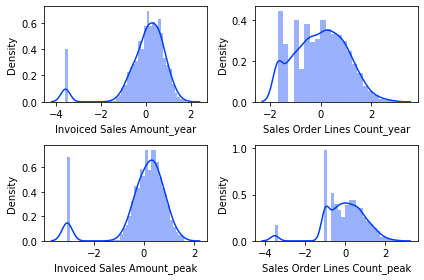

In [101]:
# see the shape an distribution of normalized data

plt.subplot(2, 2, 1); sns.distplot(rfm_normalized['Invoiced Sales Amount_year'])
plt.subplot(2, 2, 2); sns.distplot(rfm_normalized['Sales Order Lines Count_year'])
plt.subplot(2, 2, 3); sns.distplot(rfm_normalized['Invoiced Sales Amount_peak'])
plt.subplot(2, 2, 4); sns.distplot(rfm_normalized['Sales Order Lines Count_peak'])
plt.tight_layout()

plt.show()

In [102]:
# paste number of clusters to explore

k = int(input('Paste your cluster number: '))

Paste your cluster number: 4


In [103]:
# Initialize KMeans
kmeans = KMeans(n_clusters=k, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(rfm_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [104]:
rfm_index = rfm_l.index

In [105]:
rfm = rfm.loc[rfm.index.isin(rfm_l.index)]

In [106]:
rfm_l.shape

(2621, 6)

In [107]:
rfm_normalized.shape

(2621, 6)

In [108]:
len(set(rfm.index))

2621

In [109]:
len(set(rfm_normalized.index))

2621

In [110]:
rfm.index.duplicated().sum()

0

In [111]:
# SNAKE Create a DataFrame by adding a new cluster label column

rfm_kn = rfm.assign(Cluster=cluster_labels)

In [156]:
rfm_kn['$_per_line_year'] = round(rfm_kn['Invoiced Sales Amount_year'] / rfm_kn['Sales Order Lines Count_year'],2)

In [157]:
rfm_kn['$_per_line_peak'] = round(rfm_kn['Invoiced Sales Amount_peak'] / rfm_kn['Sales Order Lines Count_peak'],2)

In [158]:
rfm_kn.head()

,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%,Cluster,$_per_line_year,$_per_line_peak
Customer,,,,,,,,,
021484,8623.0,1137.0,114.0,13.0,11.0,13.0,1,75.64,87.46
021559,82485.0,26233.0,265.0,111.0,42.0,32.0,1,311.26,236.33
021900,2814.0,2179.0,53.0,39.0,74.0,77.0,1,53.09,55.87
022014,107311.0,27900.0,716.0,198.0,28.0,26.0,1,149.88,140.91
022337,3335.0,1994.0,26.0,14.0,54.0,60.0,1,128.27,142.43


In [161]:
# Group the data by cluster
grouped = rfm_kn.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
output_table = grouped.agg({
    'Invoiced Sales Amount_year': ['count', 'mean'],
    'peak_order_%': 'mean',
    'peak_revenue_%': 'mean',
    '$_per_line_year':'mean',
    '$_per_line_peak':'mean'
  }).round(0)

output_table.columns = ['Count', 'Avg Sales Amount (Year)', 'Avg Peak Revenue (%)', 'Avg Peak Line Count (%)', 
                        'Avg Revenue / Line Year ($)', 'Avg Revenue / Line Peak ($)']

# Add comments to the table using the index values
#output_table['Comment'] = []

output_table.head()

,Count,Avg Sales Amount (Year),Avg Peak Revenue (%),Avg Peak Line Count (%),Avg Revenue / Line Year ($),Avg Revenue / Line Peak ($)
Cluster,,,,,,
0,1104,1313.0,72.0,75.0,289.0,331.0
1,1252,20272.0,37.0,37.0,179.0,202.0
2,76,5685.0,0.0,62.0,811.0,332753.0
3,189,1330.0,74.0,65.0,66.0,0.0


# SNAKE

In [113]:
rfm_kn.index

Index(['021484', '021559', '021900', '022014', '022337', '022362', '022407',
       '022417', '022597', '022845',
       ...
       '347934', '347935', '347937', '347938', '347939', '347941', '347942',
       '347943', '347945', '347946'],
      dtype='object', name='Customer', length=2621)

In [114]:
rfm_normalized.index = rfm_kn.index

In [115]:
rfm_normalized['Cluster'] = rfm_kn['Cluster']

In [116]:
rfm_normalized.head()

,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%,Cluster
Customer,,,,,,,
021484,0.579615,0.308370,1.119073,0.426960,-0.691827,-0.524479,1
021559,1.268888,1.216947,1.620109,1.612472,0.160185,0.002086,1
021900,0.237807,0.496670,0.664145,1.034267,0.520377,0.515372,1
022014,1.349199,1.234782,2.210489,1.932394,-0.097665,-0.119292,1
022337,0.289656,0.470986,0.241119,0.467927,0.320006,0.369547,1


In [120]:
# Melt the normalized dataset and reset the index
rfm_n_melt1 = pd.melt(rfm_normalized.reset_index(), 
                        
# Assign CustomerID and Cluster as ID variables                  
                    id_vars=['Cluster'],

# Assign RFM values as value variables
                    value_vars=['peak_revenue_%', 'Invoiced Sales Amount_peak', 'peak_order_%'], 
                        
# Name the variable and value
                    var_name='Attribute', value_name='Value')

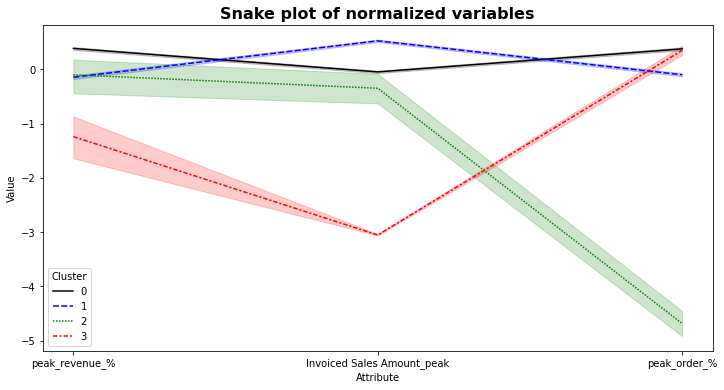

In [162]:
plt.subplots(figsize=(12, 6))
plt.title('Snake plot of normalized variables', fontsize=16, fontweight='bold')
sns.lineplot(x='Attribute', y='Value', hue='Cluster', style='Cluster', data=rfm_n_melt1, palette=['k', 'b', 'g', 'r'])
# Add the x axis label
#plt.xlabel('Metric')
# Add the y axis label
#plt.ylabel('Value')
# Plot a line for each value of the cluster variable

plt.show()

In [163]:
rfm_n_melt1.head()

,Cluster,Attribute,Value
0,1,peak_revenue_%,-0.524479
1,1,peak_revenue_%,0.002086
2,1,peak_revenue_%,0.515372
3,1,peak_revenue_%,-0.119292
4,1,peak_revenue_%,0.369547


# ELBOW

In [164]:
# Fit KMeans and calculate Sum of Squared Errors for each k
sse = {}

for k in range(1, 10):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(rfm_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

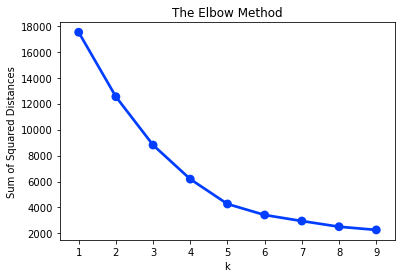

In [165]:
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('Sum of Squared Distances')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [166]:
rfm_kn.groupby('Cluster').count()

,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%,$_per_line_year,$_per_line_peak
Cluster,,,,,,,,
0,1104,1104,1104,1104,1104,1104,1104,1104
1,1252,1252,1252,1252,1252,1252,1252,1252
2,76,76,76,76,76,76,76,76
3,189,189,189,189,189,189,189,189


In [169]:
rfm_kn[rfm_kn.Cluster == 1].max()

Invoiced Sales Amount_year      445248.00
Invoiced Sales Amount_peak       98122.00
Sales Order Lines Count_year      2381.00
Sales Order Lines Count_peak       688.00
peak_order_%                       100.00
peak_revenue_%                     100.00
Cluster                              1.00
$_per_line_year                   4741.93
$_per_line_peak                  18949.00
dtype: float64

In [170]:
rfm_kn.reset_index()

,Customer,Invoiced Sales Amount_year,Invoiced Sales Amount_peak,Sales Order Lines Count_year,Sales Order Lines Count_peak,peak_order_%,peak_revenue_%,Cluster,$_per_line_year,$_per_line_peak
0,021484,8623.00,1137.00,114.0,13.0,11.0,13.0,1,75.64,87.46
1,021559,82485.00,26233.00,265.0,111.0,42.0,32.0,1,311.26,236.33
2,021900,2814.00,2179.00,53.0,39.0,74.0,77.0,1,53.09,55.87
3,022014,107311.00,27900.00,716.0,198.0,28.0,26.0,1,149.88,140.91
4,022337,3335.00,1994.00,26.0,14.0,54.0,60.0,1,128.27,142.43
...,...,...,...,...,...,...,...,...,...,...
2616,347941,89.00,89.00,1.0,1.0,100.0,100.0,0,89.00,89.00
2617,347942,128.00,128.00,2.0,2.0,100.0,100.0,0,64.00,64.00
2618,347943,425.00,425.00,12.0,12.0,100.0,100.0,0,35.42,35.42
2619,347945,0.01,0.01,4.0,4.0,100.0,100.0,3,0.00,0.00


# RELATIVE IMPORTANCE

In [171]:
rfm_ri = rfm_kn[['peak_revenue_%', 'Invoiced Sales Amount_year', 'peak_order_%',  'Cluster']]

In [172]:
# Calculate average RFM values for each cluster
cluster_avg = rfm_ri.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = rfm[['peak_revenue_%', 'Invoiced Sales Amount_year', 'peak_order_%']].mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance scores rounded to 2 decimals
print(relative_imp.round(2))

         peak_revenue_%  Invoiced Sales Amount_year  peak_order_%
Cluster                                                          
0                  0.35                       -0.87          0.35
1                 -0.34                        0.93         -0.30
2                  0.11                       -0.46         -1.00
3                  0.16                       -0.87          0.39


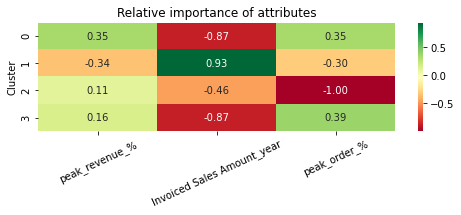

In [173]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.xticks(rotation=25)
plt.show()

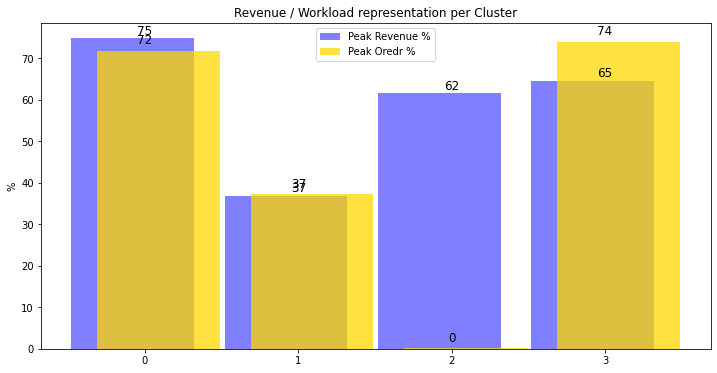

In [234]:

df_revenue = rfm_kn.groupby('Cluster')['peak_revenue_%'].mean()
df_order = rfm_kn.groupby('Cluster')['peak_order_%'].mean()
X = set(rfm_kn['Cluster'])

plt.subplots(figsize=(12,6))
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.08, df_revenue, label='Peak Revenue %', color='blue', alpha=0.5)
plt.bar(X_axis + 0.09, df_order, label='Peak Oredr %', color='gold', alpha=0.75)

plt.title('Revenue / Workload representation per Cluster')
plt.ylabel('%')
plt.xticks(X_axis, X)
plt.legend()

for i, df_revenue in enumerate(df_revenue):
    plt.text(i, df_revenue + 1, str(round(df_revenue)), fontsize=12, ha='center', va='baseline', animated=True)

for i, df_order in enumerate(df_order):
    plt.text(i, df_order + 1, str(round(df_order)), fontsize=12,  ha='center', va='bottom', animated=True)

plt.show()

# CLUSTER 0

In [174]:
c_0 = rfm_kn[rfm_kn['Cluster']==0] #low peak

In [175]:
print('Cluster 0: \n# Customers: {}\nInvoiced Sales Amount 2022 MEAN: {} EUR\nInvoiced Sales Amount Peak MEAN: {} EUR \nSales Order Lines Count Peak SUM: {}\nMEAN peak_order_%: {}% \nMEAN peak_revenue_%: {}%'\
      .format(c_0.shape[0],\
             round(c_0['Invoiced Sales Amount_year'].mean(), 2),\
             round(c_0['Invoiced Sales Amount_peak'].mean(), 2), \
             round(c_0['Sales Order Lines Count_peak'].sum(), 2),\
             round(c_0['peak_order_%'].mean(), 0), \
             round(c_0['peak_revenue_%'].mean(), 0)))


Cluster 0: 
# Customers: 1104
Invoiced Sales Amount 2022 MEAN: 1312.92 EUR
Invoiced Sales Amount Peak MEAN: 869.47 EUR 
Sales Order Lines Count Peak SUM: 4575.0
MEAN peak_order_%: 72.0% 
MEAN peak_revenue_%: 75.0%


(0.0, 10000.0)

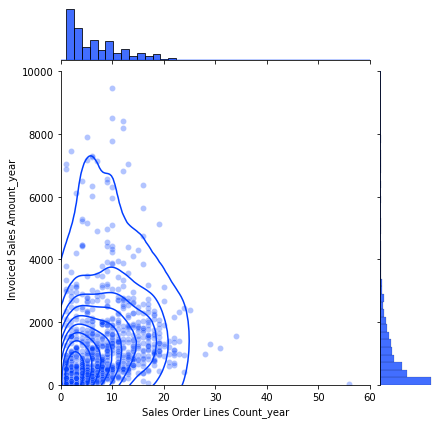

In [159]:
g1 = sns.JointGrid(data=c_0, y='Invoiced Sales Amount_year', x='Sales Order Lines Count_year')
g1.plot(sns.scatterplot, sns.histplot)
g1.plot_joint(sns.kdeplot)
g1.plot_marginals(sns.kdeplot)
g1.ax_joint.collections[0].set_alpha(0.3)
g1.ax_joint.set_xlim(0, 60)
g1.ax_joint.set_ylim(0, 10000)

# CLUSTER 1

In [178]:
c_1 = rfm_kn[rfm_kn['Cluster']==1] #all at peak

In [179]:
print('Cluster 1: \n# Customers: {}\nInvoiced Sales Amount 2022 MEAN: {} EUR\nInvoiced Sales Amount Peak MEAN: {} EUR \nSales Order Lines Count Peak SUM: {}\nMEAN peak_order_%: {}% \nMEAN peak_revenue_%: {}%'\
      .format(c_1.shape[0],\
             round(c_1['Invoiced Sales Amount_year'].mean(), 2),\
             round(c_1['Invoiced Sales Amount_peak'].mean(), 2), \
             round(c_1['Sales Order Lines Count_peak'].sum(), 2),\
             round(c_1['peak_order_%'].mean(), 0), \
             round(c_1['peak_revenue_%'].mean(), 0)))


Cluster 1: 
# Customers: 1252
Invoiced Sales Amount 2022 MEAN: 20271.98 EUR
Invoiced Sales Amount Peak MEAN: 6168.57 EUR 
Sales Order Lines Count Peak SUM: 50160.0
MEAN peak_order_%: 37.0% 
MEAN peak_revenue_%: 37.0%


(0.0, 90000.0)

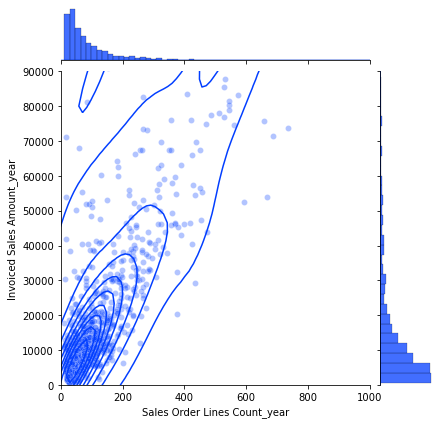

In [191]:
g1 = sns.JointGrid(data=c_1, y='Invoiced Sales Amount_year', x='Sales Order Lines Count_year')
g1.plot(sns.scatterplot, sns.histplot)
g1.plot_joint(sns.kdeplot)
g1.plot_marginals(sns.kdeplot)
g1.ax_joint.collections[0].set_alpha(0.3)
g1.ax_joint.set_xlim(0, 1000)
g1.ax_joint.set_ylim(0, 90000)

# CLUSTER 2

In [212]:
c_2 = rfm_kn[rfm_kn['Cluster']==2] #no peak focuse

In [213]:
print('Cluster 2: \n# Customers: {}\nInvoiced Sales Amount 2022 MEAN: {} EUR\nInvoiced Sales Amount Peak MEAN: {} EUR \nSales Order Lines Count Peak SUM: {}\nMEAN peak_order_%: {}% \nMEAN peak_revenue_%: {}%'\
      .format(c_2.shape[0],\
             round(c_2['Invoiced Sales Amount_year'].mean(), 2),\
             round(c_2['Invoiced Sales Amount_peak'].mean(), 2), \
             round(c_2['Sales Order Lines Count_peak'].sum(), 2),\
             round(c_2['peak_order_%'].mean(), 0), \
             round(c_2['peak_revenue_%'].mean(), 0)))


Cluster 2: 
# Customers: 76
Invoiced Sales Amount 2022 MEAN: 5685.07 EUR
Invoiced Sales Amount Peak MEAN: 3327.53 EUR 
Sales Order Lines Count Peak SUM: 0.76
MEAN peak_order_%: 0.0% 
MEAN peak_revenue_%: 62.0%


(0.0, 80000.0)

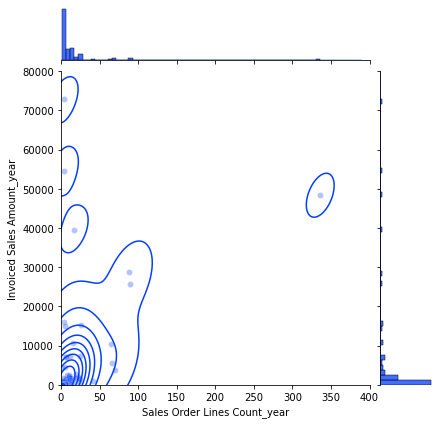

In [243]:
g1 = sns.JointGrid(data=c_2, y='Invoiced Sales Amount_year', x='Sales Order Lines Count_year')
g1.plot(sns.scatterplot, sns.histplot)
g1.plot_joint(sns.kdeplot)
g1.plot_marginals(sns.kdeplot)
g1.ax_joint.collections[0].set_alpha(0.3)
g1.ax_joint.set_xlim(0, 400)
g1.ax_joint.set_ylim(0, 80000)

# CLUSTER 3

In [216]:
c_3 = rfm_kn[rfm_kn['Cluster']==3] #low invoiced

In [217]:
print('Cluster 3: \n# Customers: {}\nInvoiced Sales Amount 2022 MEAN: {} EUR\nInvoiced Sales Amount Peak MEAN: {} EUR \nSales Order Lines Count Peak SUM: {}\nMEAN peak_order_%: {}% \nMEAN peak_revenue_%: {}%'\
      .format(c_3.shape[0],\
             round(c_3['Invoiced Sales Amount_year'].mean(), 2),\
             round(c_3['Invoiced Sales Amount_peak'].mean(), 2), \
             round(c_3['Sales Order Lines Count_peak'].sum(), 2),\
             round(c_3['peak_order_%'].mean(), 0), \
             round(c_3['peak_revenue_%'].mean(), 0)))


Cluster 3: 
# Customers: 189
Invoiced Sales Amount 2022 MEAN: 1329.96 EUR
Invoiced Sales Amount Peak MEAN: 0.04 EUR 
Sales Order Lines Count Peak SUM: 774.01
MEAN peak_order_%: 74.0% 
MEAN peak_revenue_%: 65.0%


(0.0, 15000.0)

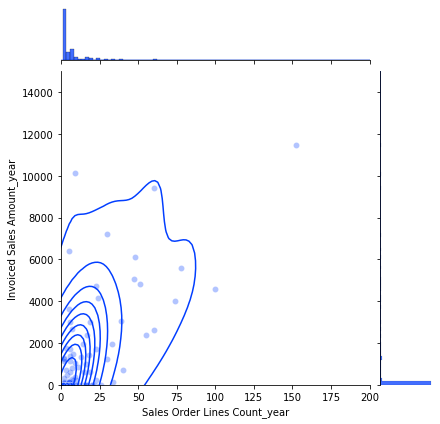

In [244]:
g1 = sns.JointGrid(data=c_3, y='Invoiced Sales Amount_year', x='Sales Order Lines Count_year')
g1.plot(sns.scatterplot, sns.histplot)
g1.plot_joint(sns.kdeplot)
g1.plot_marginals(sns.kdeplot)
g1.ax_joint.collections[0].set_alpha(0.3)
g1.ax_joint.set_xlim(0, 200)
g1.ax_joint.set_ylim(0, 15000)

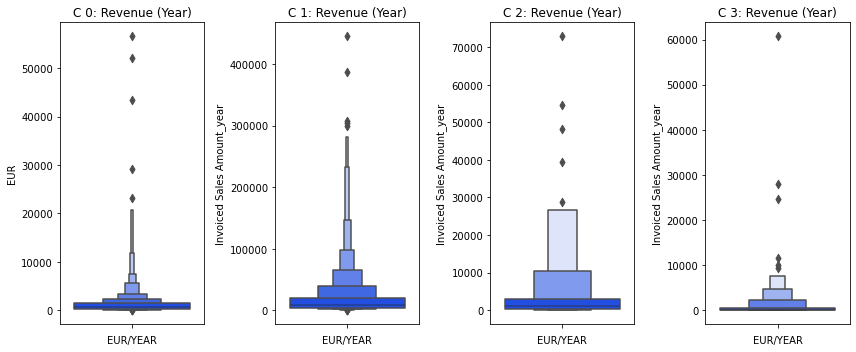

In [245]:
sns.set_palette('bright')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 5))

# Create the first boxenplot on the first subplot
sns.boxenplot(data=c_0, y='Invoiced Sales Amount_year', ax=ax1)
ax1.set_title('C 0: Revenue (Year)')
ax1.set_xlabel('EUR/YEAR')
ax1.set_ylabel('EUR')

# Create the second boxenplot on the second subplot
sns.boxenplot(data=c_1, y='Invoiced Sales Amount_year', ax=ax2)
ax2.set_title('C 1: Revenue (Year)')
ax2.set_xlabel('EUR/YEAR')

# Create the second boxenplot on the second subplot
sns.boxenplot(data=c_2, y='Invoiced Sales Amount_year', ax=ax3)
ax3.set_title('C 2: Revenue (Year)')
ax3.set_xlabel('EUR/YEAR')

# Create the second boxenplot on the second subplot
sns.boxenplot(data=c_3, y='Invoiced Sales Amount_year', ax=ax4)
ax4.set_title('C 3: Revenue (Year)')
ax4.set_xlabel('EUR/YEAR')


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

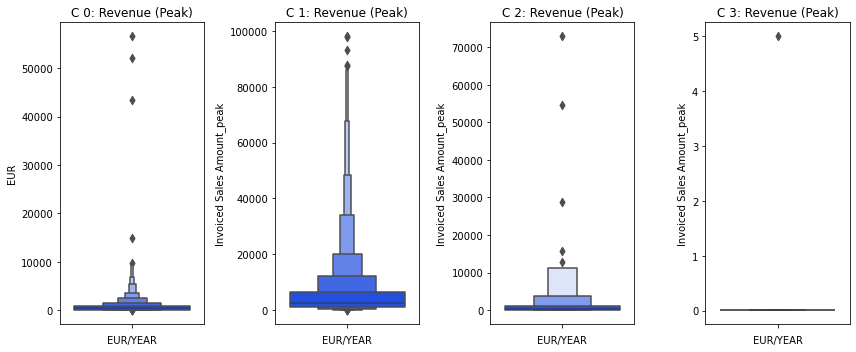

In [246]:
sns.set_palette('bright')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 5))

# Create the first boxenplot on the first subplot
sns.boxenplot(data=c_0, y='Invoiced Sales Amount_peak', ax=ax1)
ax1.set_title('C 0: Revenue (Peak)')
ax1.set_xlabel('EUR/YEAR')
ax1.set_ylabel('EUR')

# Create the second boxenplot on the second subplot
sns.boxenplot(data=c_1, y='Invoiced Sales Amount_peak', ax=ax2)
ax2.set_title('C 1: Revenue (Peak)')
ax2.set_xlabel('EUR/YEAR')

# Create the second boxenplot on the second subplot
sns.boxenplot(data=c_2, y='Invoiced Sales Amount_peak', ax=ax3)
ax3.set_title('C 2: Revenue (Peak)')
ax3.set_xlabel('EUR/YEAR')

# Create the second boxenplot on the second subplot
sns.boxenplot(data=c_3, y='Invoiced Sales Amount_peak', ax=ax4)
ax4.set_title('C 3: Revenue (Peak)')
ax4.set_xlabel('EUR/YEAR')


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [136]:
writer = pd.ExcelWriter(str(input('Paste your path and filename here: ')), engine='xlsxwriter')

In [137]:
c_0.to_excel(writer, 
             sheet_name='Cluster 0', 
             index=True)

In [138]:
c_1.to_excel(writer, 
             sheet_name='Cluster 1', 
             index=True)

In [139]:
c_2.to_excel(writer, 
             sheet_name='Cluster 2', 
            index=True)

In [140]:
c_3.to_excel(writer, 
             sheet_name='Cluster 3', 
            index=True)

In [141]:
writer.save()